<a href="https://colab.research.google.com/github/HC-JEONG/Introduction_to_Machine_Learning_with_Python/blob/master/Chapter_3-3_Preprocessing_and_Scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.3 데이터 전처리와 스케일 조정

> 신경망과 SVM 같은 알고리즘은 데이터의 스케일에 매우 민감하다. 그래서 보통 이런 알고리즘들에 맞게 특성마다 스케일을 조정해서 데이터를 변경한다.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm
from matplotlib import rc
%matplotlib inline
import pandas as pd
!pip install mglearn
import mglearn
import scipy as sp
import sklearn
import graphviz
from IPython.display import display
from sklearn.pipeline import make_pipeline
from google.colab import files
import io

!apt-get update -qq
!apt-get install fonts-nanum* -qq
sys_font=fm.findSystemFonts()
nanum_font = [f for f in sys_font if 'Nanum' in f]
nanum_font
path = '/usr/share/fonts/truetype/nanum/NanumGothicEco.ttf'

font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)

plt.rc('font', family=font_name)
mpl.rcParams['axes.unicode_minus'] = False

fm._rebuild()

NanumGothic Eco


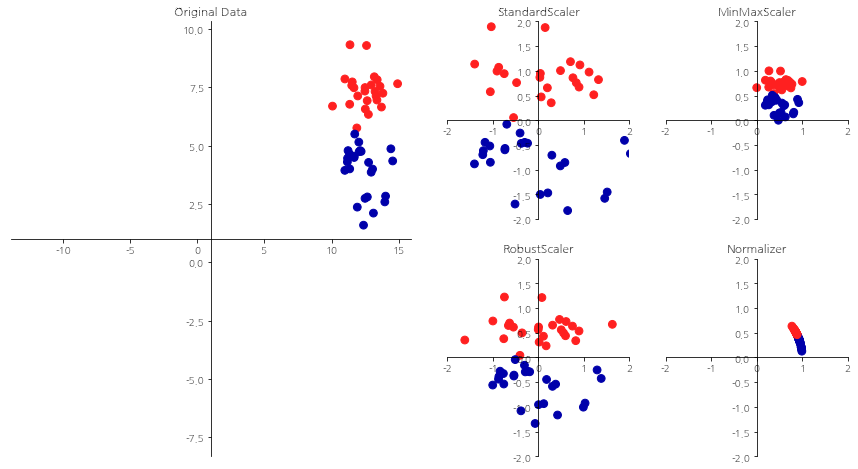

In [0]:
# 스케일 조정의 간단한 예
mglearn.plots.plot_scaling()

## 3.3.1 여러 가지 전처리 방법

*   StandardScaler : 각 특성의 평균을 0, 분산을 1로 변경하여 모든 특성이 같은 크기를 가지게 한다(기존에 알고 있는 z-score). 특성의 최솟값과 최댓값 크기를 제한하지 않는다.


*   RobustScaler : 특성들이 같은 스케일을 갖게 된다는 점에서 StandardScaler와 같지만 중간 값(median)과 사분위 값(quartile)을 사용하기 때문에, 전체 데이터와 아주 동떨어진 데이터 포인트(예를 들면, 측정 에러)(outlier)에 영향을 받지 않는다.


*   MinMaxScaler : 모든 특성이 정확하게 0과 1사이에 위치하도록 데이터를 변경한다.


*   Normalizer : 특성 벡터의 유클리디안 길이가 1이 되도록 데이터 포인트를 조정한다. 각 데이터 포인트가 다른 비율로(길이에 반비례하여) 스케일이 조정된다는 뜻으로 이러한 정규화(normalization)는 특성 벡터의 길이는 상관 없고 데이터의 방향 (또는 각도)만이 중요할 때 많이 사용한다.










## 3.3.2 데이터 변환 적용하기


> 스케일을 조정하는 전처리 메서드들은 보통 지도 학습 알고리즘을 적용하기 전에 적용한다.



In [0]:
# cancer dataset에 SVM(SVC)을 적용하고 데이터 전처리에는 MinMaxScaler를 사용

# 예제를 풀어보기 위해 cancer dataset을 split한다.
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer=load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [0]:
# 전처리가 구현된 파이썬 클래스를 임포트하고 객체를 생성
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

> scaler 객체는 fit 메서드를 호출할 때 X_train만 넘겨주고 y_train은 사용하지 않는다.

In [0]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

> fit 메서드로 학습한 변환을 적용하려면, 즉 실제로 training set의 스케일을 조정하려면 scaler 객체의 transform 메서드를 사용한다. scikit-learn에서 transform은 새로운 데이터 표현(representation)을 만들 때 사용하는 메서드다.

In [0]:
# 데이터 변환
X_train_scaled = scaler.transform(X_train)
# 스케일이 조정된 후 데이터셋의 속성을 출력합니다.
print("변환된 후 크기:", X_train_scaled.shape)
print("스케일 조정 전 특성별 최소값:\n", X_train.min(axis=0))
print("스케일 조정 전 특성별 최대값:\n", X_train.max(axis=0))
print("스케일 조정 후 특성별 최소값:\n", X_train_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_train_scaled.max(axis=0))

#모든 특성의 값은 0과 1 사이로 변환되고, 변환된 데이터의 배열 크기는 원래 데이터와 동일하다. 즉 특성 값이 이동되거나 크기가 조정되었을 뿐

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


> 변환된 데이터의 배열 크기는 원래 데이터와 동일하다. 즉 특성 값이 이동되거나 크기만 조정되었을 뿐이다.

In [0]:
# 테스트 데이터 변환
X_test_scaled = scaler.transform(X_test)
# 스케일이 조정된 후 테스트 데이터의 속성을 출력합니다.
print("스케일 조정 후 특성별 최소값:\n", X_test_scaled.min(axis=0))
print("스케일 조정 후 특성별 최대값:\n", X_test_scaled.max(axis=0))

# 0~1 값이 아닌 이유는 훈련 세트와 테스트 세트에 같은 변환이 적용되어야 하기 때문에, transform 메서드는 테스트 세트에 훈련 세트의 최솟값을 빼고 훈련 세트의 범위로 나누기 때문이다.

> 특성 별 최소, 최대값이 각각 0과 1이 아니다. 이 이유는 MinMaxScaler는 항상 training set과 test set에 같은 변환을 적용해야 하기 때문이다. 따라서 transform 메서드는 테스트 세트의 최솟값과 범위를 사용하지 않고, 항상 training set의 최솟값을 빼고 training set의 범위로 나눈다.

## 3.3.3 (한국어판 부록) Quantile Transformer와 PowerTransformer


> Quantile Transformer는 기본적으로 1,000개의 분위(quantile)을 사용하여 데이터를 균등하게 분포시킨다. 이상치에 민감하지 않고 전체 데이터를 0과 1사이로 압축한다.



In [0]:
# 필요한 모듈 임포트
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

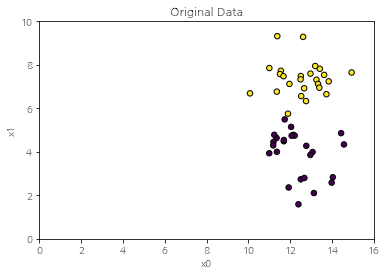

In [0]:
# 예제 데이터 생성
X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 16)
plt.xlabel('x0')
plt.ylim(0, 10)
plt.ylabel('x1')
plt.title("Original Data")
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


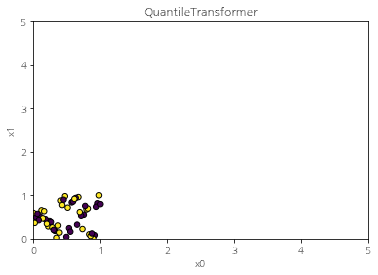

In [0]:
# QuantileTransformer 적용
scaler = QuantileTransformer()
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.xlabel('x0')
plt.ylim(0, 5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

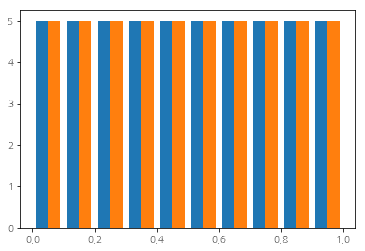

In [0]:
# 히스토그램
plt.hist(X_trans)
plt.show()



> QuantileTransformer의 분위 수는 n_quantiles 매개변수에서 설정할 수 있으며 기본값은 1,000이다.



In [0]:
# 속성 크기 확인
print(scaler.quantiles_.shape)

(50, 2)


In [0]:
# 하나의 특성과 다섯 개의 샘플로 이루어진 간단한 데이터 셋
x=np.array([[0], [5], [8], [9], [10]])

# np.percentile() 함수는 두 번째 매개변수에서 지정한 분위에 해당하는 샘플을 추출하여 반환
print(np.percentile(x[:, 0], [0, 25, 50, 75, 100]))

[ 0.  5.  8.  9. 10.]


In [0]:
# QuantileTransformer로 변환 후 확인
x_trans = QuantileTransformer().fit_transform(x)
print(np.percentile(x_trans[:, 0], [0, 25, 50, 75, 100]))

[0.   0.25 0.5  0.75 1.  ]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


> QuantileTransformer는 output_distribution 매개변수에서 normal로 지정하여 균등 분포가 아니라 정규분포로 출력을 바꿀 수 있다.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


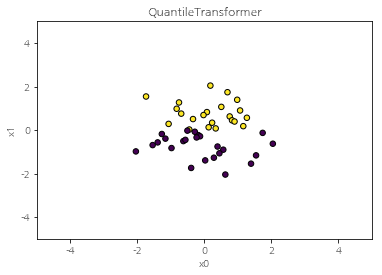

In [0]:
scaler = QuantileTransformer(output_distribution='normal')
X_trans = scaler.fit_transform(X)

plt.scatter(X_trans[:, 0], X_trans[:, 1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.xlabel('x0')
plt.ylim(-5,5)
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

> scikit-learn에는 데이터의 특성별로 정규분포 형태에 가깝도록 변환해주는 PowerTransformer가 추가되었다. method 매개변수에 'yeo-johnson'과 'box-cox' 알고리즘을 지정할 수 있다.

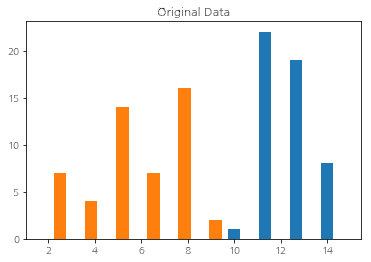

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


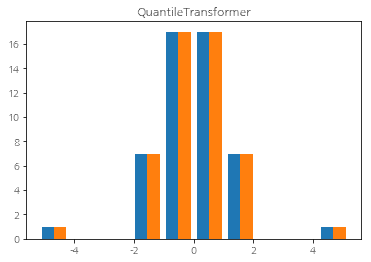

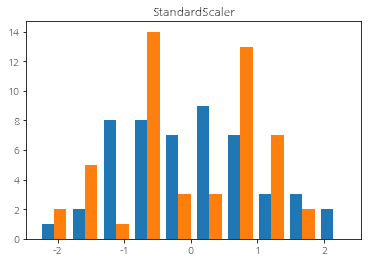

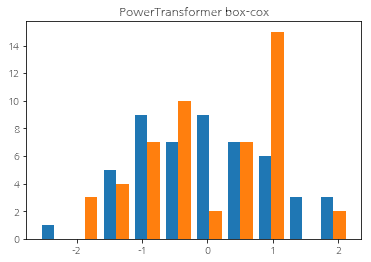

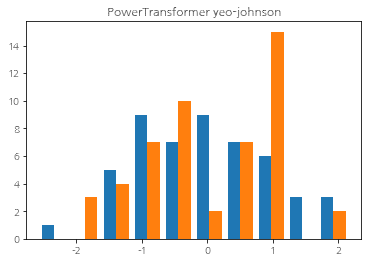

In [0]:
plt.hist(X)
plt.title('Original Data')
plt.show()

X_trans = QuantileTransformer(output_distribution='normal').fit_transform(X)
plt.hist(X_trans)
plt.title('QuantileTransformer')
plt.show()

X_trans = StandardScaler().fit_transform(X)
plt.hist(X_trans)
plt.title('StandardScaler')
plt.show()

X_trans = PowerTransformer(method='box-cox').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer box-cox')
plt.show()

X_trans = PowerTransformer(method='yeo-johnson').fit_transform(X)
plt.hist(X_trans)
plt.title('PowerTransformer yeo-johnson')
plt.show()

## 3.3.4 훈련 데이터와 테스트 데이터의 스케일을 같은 방법으로 조정하기

> 지도 학습 모델에서 test set을 사용하려면 training set과 test set에 같은 변환을 적용해야 한다.



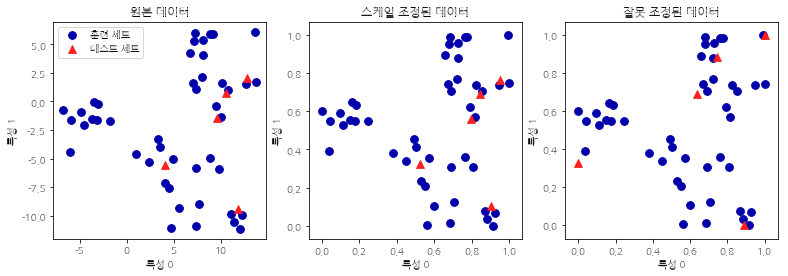

In [0]:
# 스케일 조정 할 때 테스트 세트를 이용해서 하는 경우

from sklearn.datasets import make_blobs
# 인위적인 데이터 생성
X, _= make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# training set과 test set으로 나눕니다.
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)

# training set과 test set의 산점도를 그립니다.
fig, axes = plt.subplots(1, 3, figsize=(13,4))
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("원본 데이터")

#MinMaxScaler를 사용해 스케일을 조정합니다.
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 스케일이 조정된 데이터의 산점도를 그립니다.
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="훈련 세트", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                c=mglearn.cm2.colors[1], label="테스트 세트", s=60)
axes[1].set_title("스케일 조정된 데이터")

# test set의 스케일을 따로 조정합니다.
# test set의 최솟값은 0, 최댓값은 1이 됩니다.
# 이는 예제를 위한 것으로, 절대로 이렇게 사용해서는 안 됩니다.
test_scaler=MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# 잘못 조정된 데이터의 산점도를 그립니다.
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                c=mglearn.cm2.colors[0], label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', c=mglearn.cm2.colors[1], label="test set", s=60)
axes[2].set_title("잘못 조정된 데이터")

for ax in axes:
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

> 왼쪽 그래프는 2차원 원본 dataset이며, training set은 원, test set은 삼각형으로 표현돼있다. 가운데 그래프는 같은 데이터를 MinMaxScaler로 올바르게 스케일을 조정한 것이다. 오른쪽 그래프는 training set과 test set의 스케일을 서로 다른 방식으로 조정했을 때의 결과이다. test set의 개체가 training set의 개체와 스케일이 다르게 조정되었기 때문에 training set과 다른 비율로 이동했다. 따라서 원본 데이터와 비교 했을 때 데이터 배열이 뒤죽박죽 섞이게 된다. 따라서 반드시 지도 학습 모델에서 training set의 범위와 같은 변환을 적용해야 한다.

### 단축 메서드와 효율적인 방법

> 보통 어떤 dataset에 fit을 적용하면 transform을 호출한다. 이는 매우 전형적인 작업이라 fit과 transform을 차례로 호출하는 것보다 효율적인 방법이 필요하다. 이럴 때를 위해 transform 메서드를 가진 모든 모델은 fit_transform 메서드를 제공한다.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 메소드 체이닝(chaining)을 사용하여 fit과 transform을 연달아 호출합니다.
X_scaled = scaler.fit(X_train).transform(X_train)
# 위와 동일하지만 더 효율적입니다.
X_scaled_d = scaler.fit_transform(X_train)

## 3.3.5 지도 학습에서 데이터 전처리 효과

In [0]:
# cancer dataset에서 SVC를 학습시킬 때 MinMaxScaler의 효과 확인

from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm=SVC(C=100)
svm.fit(X_train, y_train)
print("테스트 세트 정확도: {:.2f}".format(svm.score(X_test, y_test)))

테스트 세트 정확도: 0.63


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [0]:
# MinMaxScaler를 사용해 데이터 스케일 조정

# 0~1 사이로 스케일 조정
scaler=MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("스케일 조정된 테스트 세트의 정확도: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

스케일 조정된 테스트 세트의 정확도: 0.97


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


> 모든 전처리 모델이 동일한 fit, transform 메서드를 제공하므로 사용하는 파이썬 클래스만 바꾸면 다른 전처리 알고리즘으로 손쉽게 교체할 수 있다.

In [0]:
# 평균 0, 분산 1을 갖도록 스케일 조정
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#조정된 데이터로 SVM 학습
svm.fit(X_train_scaled, y_train)

# 스케일 조정된 테스트 세트의 정확도
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96
